<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [80]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

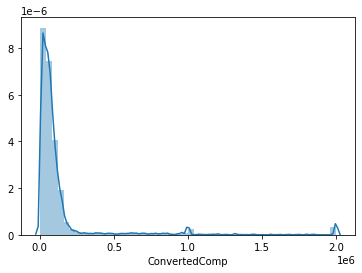

In [27]:
# your code goes here
import seaborn as sns
sns.distplot(df['ConvertedComp'].dropna(), kde = True)
#It's because you have missing values in your "nn" variable and seaborn distplot does not handle missing values,
#you can remove the missing values when plotting:

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:>

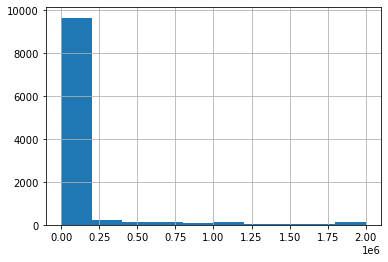

In [81]:
# your code goes here
df['ConvertedComp'].hist()

What is the median of the column `ConvertedComp`?


In [82]:
# your code goes here
df[['ConvertedComp']].median()

ConvertedComp    57745.0
dtype: float64

How many responders identified themselves only as a **Man**?


In [83]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
import seaborn as sns
sns.distplot(df['ConvertedComp'].dropna(), kde = True)
#It's because you have missing values in your "nn" variable and seaborn distplot does not handle missing values,
#you can remove the missing values when plotting:

df[['ConvertedComp']].median()

# so u cant simply call it as list , first make a new dataframe of woman and cal median for that
df['Gender'].value_counts()
df_woman= df[df['Gender'] =='Woman']
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [31]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:>

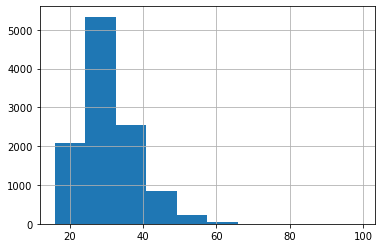

In [60]:
# your code goes here
df['Age'].hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


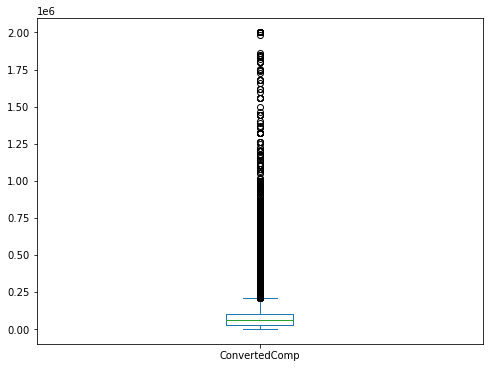

In [37]:
# your code goes here
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
df1= pd.DataFrame(data=df['ConvertedComp'])
df1.plot(kind='box' ,figsize=(8,6))
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [40]:
# plot box plot 

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
df1= pd.DataFrame(data=df['ConvertedComp'])
df1.plot(kind='box' ,figsize=(8,6))
plt.show()


# find the inter quantile 
q1,q3= df['ConvertedComp'].quantile(0.25),df['ConvertedComp'].quantile(0.75)
iqr= q3-q1
print(iqr)

# find the upper and lower limit , such that it will be easier for outliers
upper= q3+ (1.5)*iqr
lower = q1 - (1.5)*iqr

#  Number of outliers 

((df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)).sum()

print(upper,lower)

# remove the outliers from dataframe

df2 = pd.DataFrame(data= df['ConvertedComp']).clip(upper,lower)
df2.describe()

# correlation of a column, with others to make sure which factors need to be considered 
df.corr()['ConvertedComp']

73132.0


Find out the upper and lower bounds.


In [84]:
# your code goes here
upper= q3+ ((1.5)*iqr)
lower = q1 - ((1.5)*iqr)

print(upper,lower)

209698.0 -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [85]:
#  Number of outliers 

((df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)).sum()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [95]:
# since there is no change of data with lower outlier , we use only upper here 
final1 = df[~(df["ConvertedComp"] > (q3 + 1.5 * iqr))]
final2 = df[~(df["ConvertedComp"] < (q1 - 1.5 * iqr))]
print(final1[['ConvertedComp']].describe())
print(final2['ConvertedComp'].describe())
print(df['ConvertedComp'].describe())



count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [58]:
# your code goes here
df.corr()['ConvertedComp']

Respondent       0.002181
CompTotal        0.001037
ConvertedComp    1.000000
WorkWeekHrs      0.021143
CodeRevHrs      -0.033865
Age              0.105386
Name: ConvertedComp, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
